<a href="https://colab.research.google.com/github/leeminq1/python_ai_colab/blob/main/6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN (Convolutional Neural Network)
#### - for images!
#### - inductive bias for localization + weight sharing

### 1. Classification on MNIST dataset
#### - use Conv layer to extract feature map from images
#### - use dense layer to make scores for each class
#### - use softmax activation at the end of network to produce "probability".

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Download MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# calculate the sample mean and std
# calculate the sample mean and std
mu = X_train.mean()
# 0으로 나누는 것을 방지하기 위해서 매우 작은 값을 더해준다.
sig = X_train.std()+0.000000001

# normalize (z-score)
X_train = (X_train - mu) / sig
# print(X_train[0])

# train set과 동일한 평균과 표준편차로 test_set도 변경해줘야한다.

X_test = (X_test - mu) / sig # note! : use the same statistic with the training set!


# Change the shape of data from (W, W) to (W*W, )
# 여기서는 마지막에 1은 흑백사진이므로 채널을 맞춰주기 위해서 써준다.
X_train = X_train.reshape((-1, 28,28,1))
X_test = X_test.reshape((-1, 28,28,1))


# convert class vectors to binary class matrices (https://www.educative.io/edpresso/how-to-perform-one-hot-encoding-using-keras)
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
[[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42

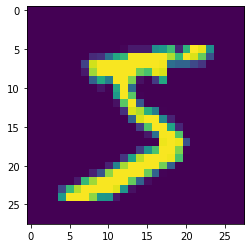

In [2]:
## data sample
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(X_train[0].reshape(28,28))
plt.show()

In [7]:
## Model (https://keras.io/api/layers/)
## 2-layer CNN with MLP
# check the #parameters! (only 10% of MLP)
# filter의 갯수만큼 output의 갯수가 나옴 , 여기서 filter는 동일 (3,3) 짜리 필터의 갯수를 몇개쓸것인가에 대한것임
# pooling layer를 쓰는 이유는 demesion reducton과 max값인 것이 예측하는 데 더 많은 정보가 들어있다고 생각함


model = keras.Sequential(
    [
      keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1, 1),
        padding="valid",
        activation='relu',
        input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1, 1),
        padding="valid",
        activation='relu',
      ),
     keras.layers.MaxPooling2D(
       pool_size=(2, 2), strides=None, padding="valid"
       ),
     layers.Flatten(),
    #  hidden layer를 써도 됨
    #  layers.Dense(100,activation='relu'),
     layers.Dense(10,activation='softmax')
    ],
    
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                46090     
                                                                 
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
__________________________________________________

In [8]:
## Train (https://keras.io/api/models/model_training_apis/)
batch_size = 64
epochs = 50

## compile
# 러닝 rate / loss / optimaizer 머 쓸건지 정함
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # keras.losses.MeanSq
## fit
hist = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 18s 10ms/step - loss: 0.1556 - accuracy: 0.9546 - val_loss: 0.0641 - val_accuracy: 0.9842
Epoch 2/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 3/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0455 - val_accuracy: 0.9878
Epoch 4/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 5/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0217 - accuracy: 0.9925 - val_loss: 0.0495 - val_accuracy: 0.9880
Epoch 6/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0617 - val_accuracy: 0.9863
Epoch 7/50
844/844 [==============================] - 8s 10ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0487 - val_accuracy: 0.9885
Epo

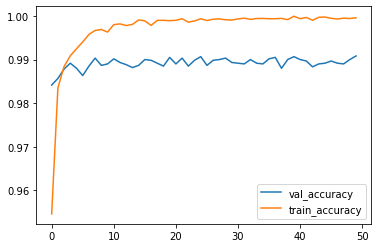

In [9]:
## plot loss and accuracy to check if the model is converged.
val_accuracy = hist.history['val_accuracy']
train_accuracy = hist.history['accuracy']

# x축을 epochs
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(epochs),val_accuracy,label="val_accuracy")
plt.plot(np.arange(epochs),train_accuracy,label="train_accuracy")
plt.legend()
plt.show()

In [10]:
## evaluate on the test set.
## you should get acc higher than 0.98
model.evaluate(X_test, y_test, verbose=1)

## When we used MLP for classification of images, we got 0.98 on the test set using 178,110 parameters.
## When we used CNN for classification of images, We get 0.99 on the test set using only 17,578 parameters !!

313/313 [==============================] - 1s 4ms/step - loss: 0.1114 - accuracy: 0.9880


[0.11141573637723923, 0.9879999756813049]

### 2. Classification on CIFAR-10 dataset (Kaggle Competition!)
#### - a. load dataset: https://keras.io/api/datasets/cifar10/
#### - b. pre-processing
#### - c. define your CNN model (Google it!) 
#### Batch Normalization (https://keras.io/api/layers/normalization_layers/batch_normalization/)
####     Same Padding (https://keras.io/api/layers/convolution_layers/convolution2d/)
#### - d. Train your model
#### - e. Tune hyperparamters of your model on the validation set
#### - f. Evaluate your model on the test set.

\
#### - GOAL : you should achieve accuracy higher than 0.75 with less than 100,000 parameters
#### make your team name as "date_name" (ex. 20220307_WonbinKweon)  ('team'탭에 가면 변경가능)
(https://www.kaggle.com/c/cifar-10-classification1234/host/all-submissions)

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Download CIFAR dataset
(X_train, y_train), (X_test, y_test) =keras.datasets.cifar10.load_data()

# calculate the sample mean and std
mu = X_train.mean()
# 0으로 나누는 것을 방지하기 위해서 매우 작은 값을 더해준다.
sig = X_train.std()+0.000000001

# normalize (z-score)
X_train = (X_train - mu) / sig
# print(X_train[0])

# train set과 동일한 평균과 표준편차로 test_set도 변경해줘야한다.

X_test = (X_test - mu) / sig # note! : use the same statistic with the training set!


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [31]:
## b. Model
model = keras.Sequential(
    [ 
      # conv 1
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      # conv 2
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      #  Pooling 
     layers.MaxPooling2D(
       pool_size=(2, 2), strides=None, padding="same" ),
      # conv 1
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      # conv 2
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      #  Pooling 
     layers.MaxPooling2D(
       pool_size=(2, 2), strides=None, padding="same" ),
     # conv 1
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      # conv 2
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      #  Pooling 
     layers.MaxPooling2D(
       pool_size=(2, 2), strides=None, padding="same" ),
      # conv 1
      layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      # conv 2
      layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      #  Pooling 
     layers.MaxPooling2D(
       pool_size=(2, 2), strides=None, padding="same" ),
      # conv 1
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      # conv 2
      layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1),padding="same",input_shape=(32,32,3)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      #  Pooling 
     layers.MaxPooling2D(
      pool_size=(2, 2), strides=None, padding="same" ),
     
      layers.Flatten(),
    #  hidden layer를 써도 됨
       layers.Dense(100,activation='relu'),
       layers.Dense(10,activation='softmax')
    ]
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 batch_normalization_94 (Bat  (None, 32, 32, 48)       192       
 chNormalization)                                                
                                                                 
 activation_94 (Activation)  (None, 32, 32, 48)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 32, 32, 48)        20784     
                                                                 
 batch_normalization_95 (Bat  (None, 32, 32, 48)       192       
 chNormalization)                                                
                                                                 
 activation_95 (Activation)  (None, 32, 32, 48)      

In [33]:
## Train
batch_size = 32
epochs = 20

## compile
# 러닝 rate / loss / optimaizer 머 쓸건지 정함
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # keras.losses.MeanSq
## fit
hist = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/20
1407/1407 [==============================] - 26s 17ms/step - loss: 0.1957 - accuracy: 0.9312 - val_loss: 1.0345 - val_accuracy: 0.7662
Epoch 2/20
1407/1407 [==============================] - 23s 16ms/step - loss: 0.1925 - accuracy: 0.9310 - val_loss: 0.9565 - val_accuracy: 0.7622
Epoch 3/20
1407/1407 [==============================] - 23s 16ms/step - loss: 0.1912 - accuracy: 0.9318 - val_loss: 1.0556 - val_accuracy: 0.7560
Epoch 4/20
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1908 - accuracy: 0.9329 - val_loss: 0.8643 - val_accuracy: 0.7804
Epoch 5/20
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1844 - accuracy: 0.9349 - val_loss: 0.9226 - val_accuracy: 0.7790
Epoch 6/20
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1854 - accuracy: 0.9340 - val_loss: 0.9247 - val_accuracy: 0.7812
Epoch 7/20
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1802 - accuracy: 0.9355 - val_loss: 1.0171 -

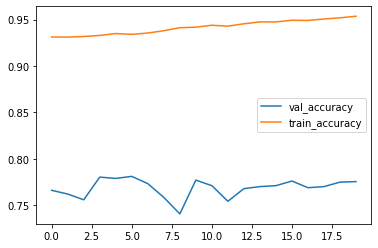

In [34]:
## plot loss and accuracy to check if the model is converged.
val_accuracy = hist.history['val_accuracy']
train_accuracy = hist.history['accuracy']

# x축을 epochs
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(epochs),val_accuracy,label="val_accuracy")
plt.plot(np.arange(epochs),train_accuracy,label="train_accuracy")
plt.legend()
plt.show()

In [35]:
## evaluate on the test set.
## you should get acc higher than 0.75
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 1.0412 - accuracy: 0.7653


[1.0412043333053589, 0.7652999758720398]

In [36]:
## Submission for Kaggle
import pandas as pd

# predict results
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Category")


submission = pd.concat([pd.Series(range(1,10001),name = "Id"),results],axis = 1)

submission.to_csv("Cifar10_classification.csv",index=False)